<a href="https://colab.research.google.com/github/bandiamithsreenivasareddy/ml-lab/blob/main/ML_lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entropy of dataset: 1.5668222768551812
Gini Index of dataset: 0.6583133442747129
Binned Data:
   alcohol  malic_acid
0      3.0         0.0
1      2.0         0.0
2      2.0         1.0
3      3.0         0.0
4      2.0         1.0
Root Feature: alcohol
Accuracy: 0.8055555555555556


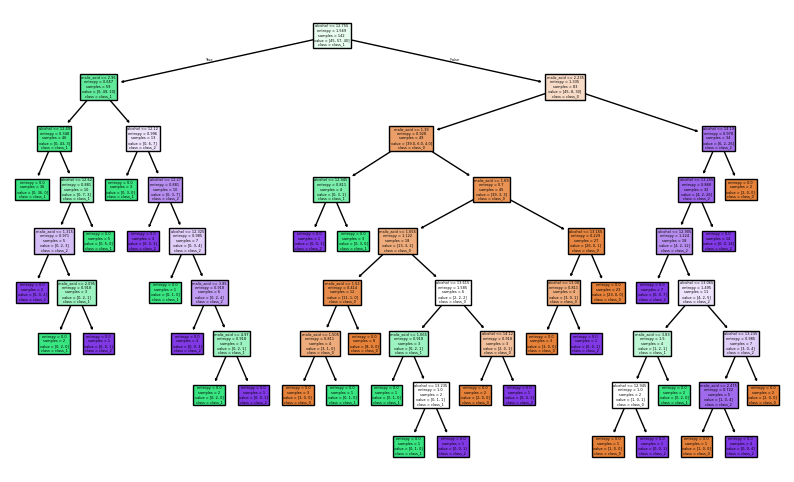

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


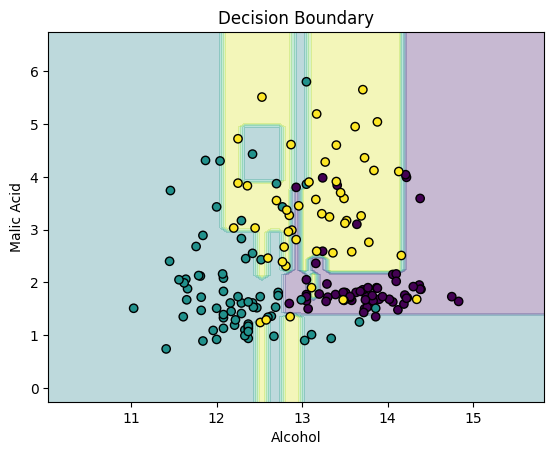

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

# Load Dataset
wine = load_wine()
df = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names'] + ['target'])

# Selecting Two Features for Visualization
df = df[['alcohol', 'malic_acid', 'target']]

# Function to Calculate Entropy
def entropy(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

print("Entropy of dataset:", entropy(df['target']))

# Function to Calculate Gini Index
def gini_index(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities ** 2)

print("Gini Index of dataset:", gini_index(df['target']))

# Function for Equal Width Binning
def bin_data(X, bins=4, strategy='uniform'):
    binner = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    return binner.fit_transform(X)

# Convert Features to Categorical
X_binned = bin_data(df[['alcohol', 'malic_acid']])
X_binned = pd.DataFrame(X_binned, columns=['alcohol', 'malic_acid'])
print("Binned Data:")
print(X_binned.head())

# Information Gain Calculation
def information_gain(X, y):
    base_entropy = entropy(y)
    unique_values = np.unique(X)
    weighted_entropy = sum([(len(X[X == value]) / len(X)) * entropy(y[X == value]) for value in unique_values])
    return base_entropy - weighted_entropy

# Identifying the Root Feature
root_feature = max(df.columns[:-1], key=lambda f: information_gain(X_binned[f], df['target']))
print(f"Root Feature: {root_feature}")

# Splitting Data for Training
X_train, X_test, y_train, y_test = train_test_split(df[['alcohol', 'malic_acid']], df['target'], test_size=0.2, random_state=42)

# Building Decision Tree
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualizing the Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['alcohol', 'malic_acid'], class_names=wine.target_names.astype(str), filled=True)
plt.show()

# Decision Boundary Visualization
x_min, x_max = df['alcohol'].min() - 1, df['alcohol'].max() + 1
y_min, y_max = df['malic_acid'].min() - 1, df['malic_acid'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(df['alcohol'], df['malic_acid'], c=df['target'], edgecolors='k')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Decision Boundary')
plt.show()
